In [7]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [15]:
!pip install pdpbox scikit-learn==0.23.1 xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 122 kB/s 
     |████████████████████████████████| 6.8 MB 42.7 MB/s 
     |████████████████████████████████| 157.5 MB 58 kB/s 
     |████████████████████████████████| 13.1 MB 41.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=2f1d30defc962046e44485e8c6676bc276aca24ddf986e0e647f86ec21082821
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=05f816d6fae9eb3bf70d291d30967ddab68473348a6d7af6a9c433070b0598ef
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib

In [17]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b1cd35acbbdf99280e3ac90692c80bce8103f756bc035c0bf98777ed3ad212b9
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [2]:
path = '/content/ToyotaCorolla.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [9]:
df_x = df[['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']]
df_y = df[['Price']]

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

In [11]:
from sklearn import linear_model

# Model
reg_model = linear_model.LinearRegression()
reg_model.fit(X_train,Y_train)

# Predict
Y_val_predict = reg_model.predict(X_val)

# Evaluate
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error (Linear regression): ' + str(error_val))

Validation Root Mean Squared Error (Linear regression): 1618.822601905907


In [18]:
from xgboost import XGBRegressor

gbr_model = XGBRegressor()
gbr_model.fit(X_train, Y_train)

# Predict
Y_val_predict = gbr_model.predict(X_val)

# Evaluate
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error (Gradient Boosting): ' + str(error_val))

[18:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Root Mean Squared Error (Gradient Boosting): 1046.352315958757


**Partial Dependence Plots**

In [19]:
from pdpbox import pdp
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)

You selected Age_08_04


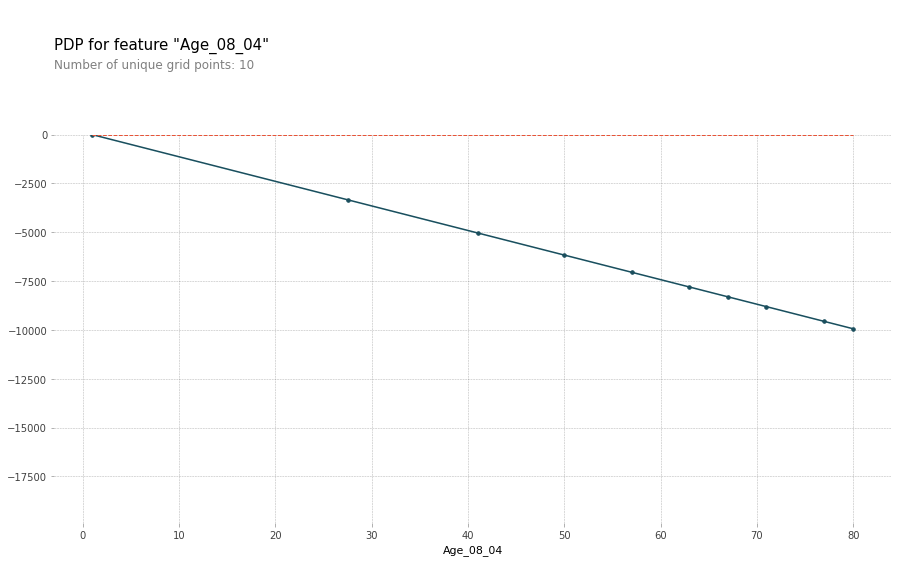

In [57]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(reg_model, X_train, selected_predictor)

You selected Age_08_04


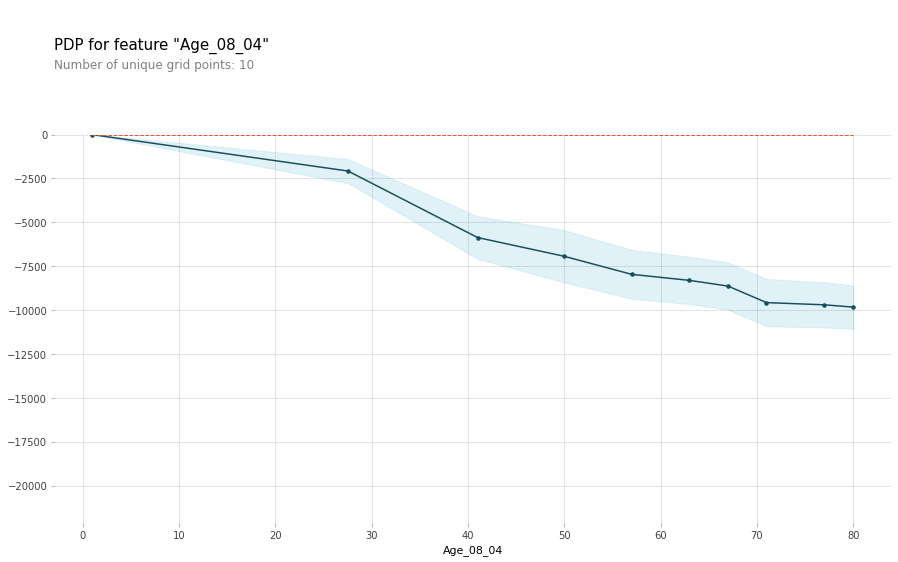

In [58]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

You selected HP


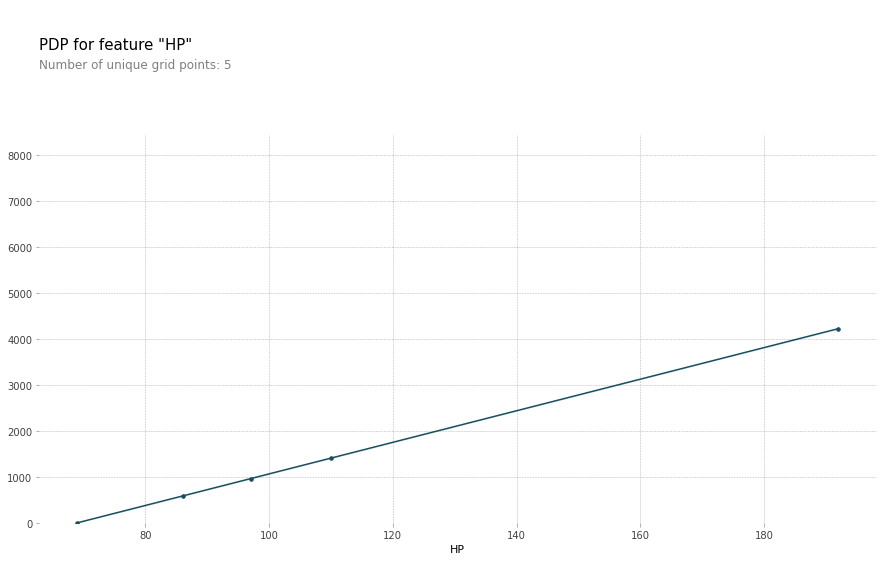

In [65]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(reg_model, X_train, selected_predictor)

You selected HP


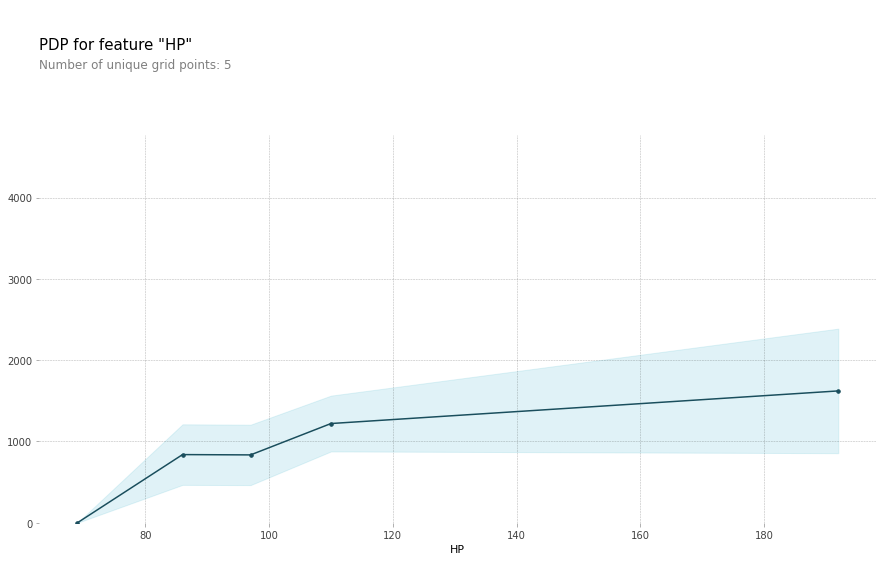

In [67]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

You selected KM


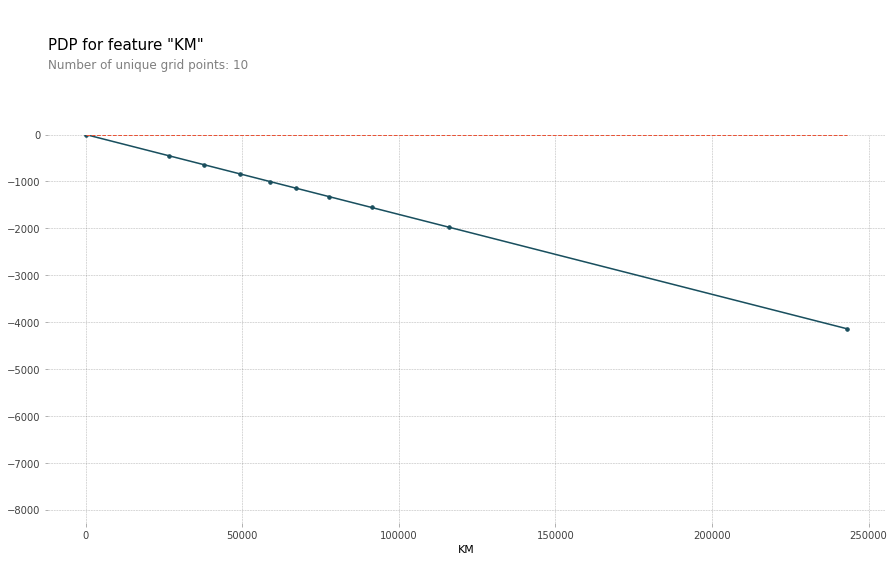

In [66]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(reg_model, X_train, selected_predictor)

You selected KM


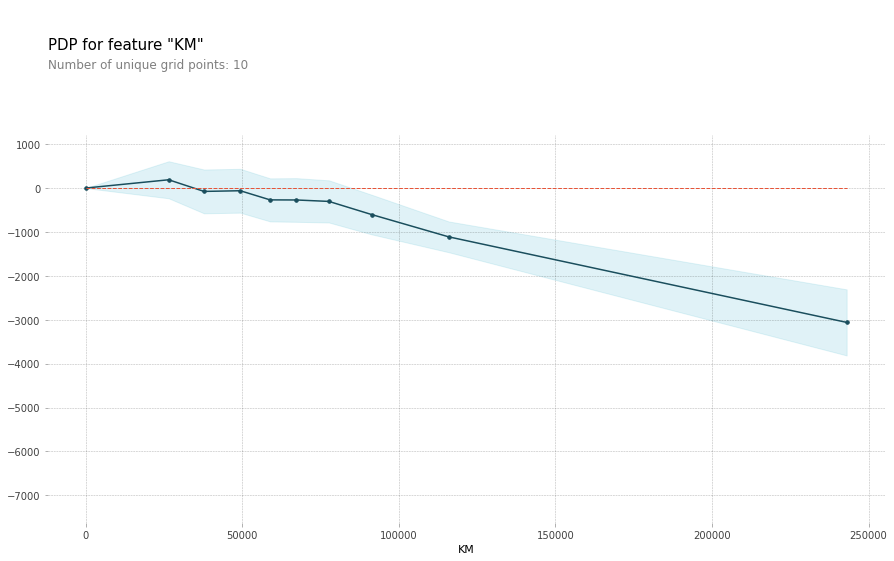

In [68]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

**ICE Plots**

You selected Age_08_04 with 13 clusters.


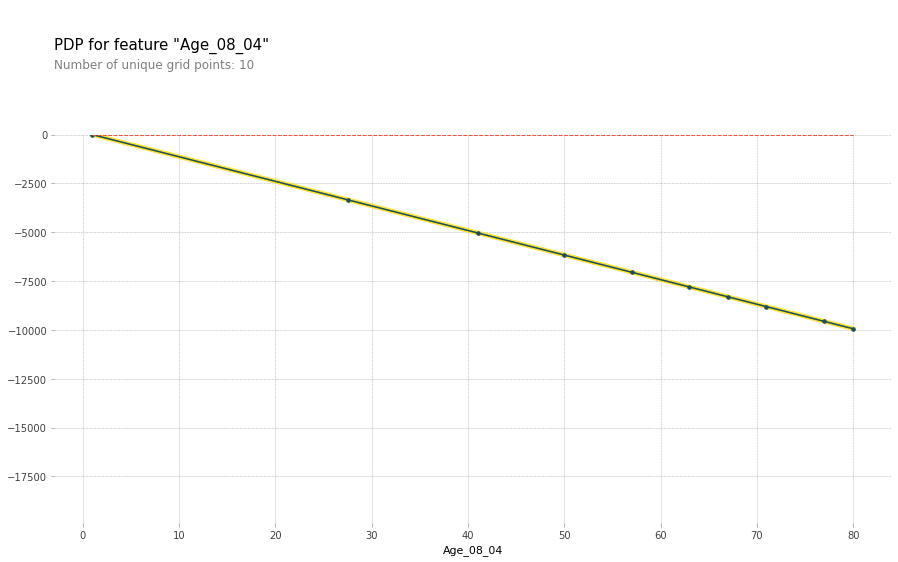

In [64]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 13 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(reg_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected Age_08_04 with 15 clusters.


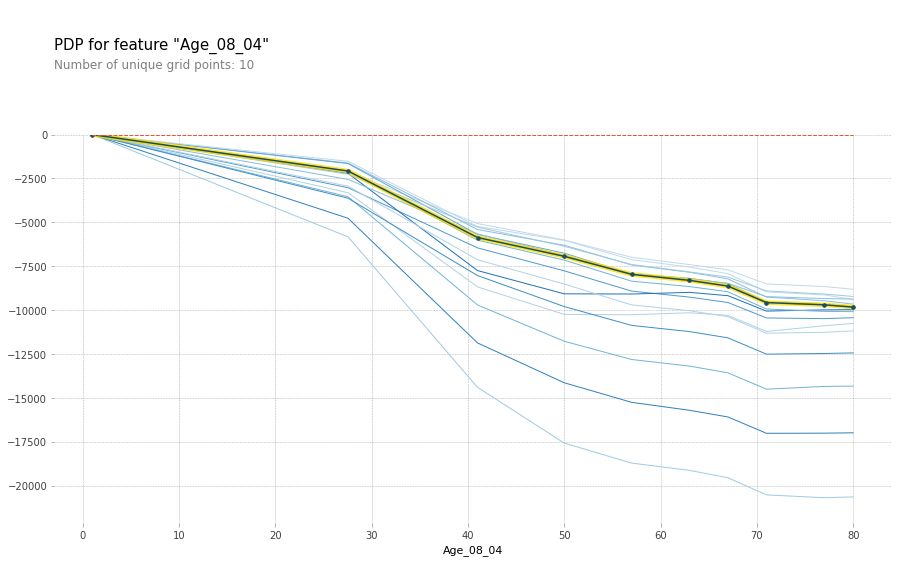

In [61]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected HP with 13 clusters.


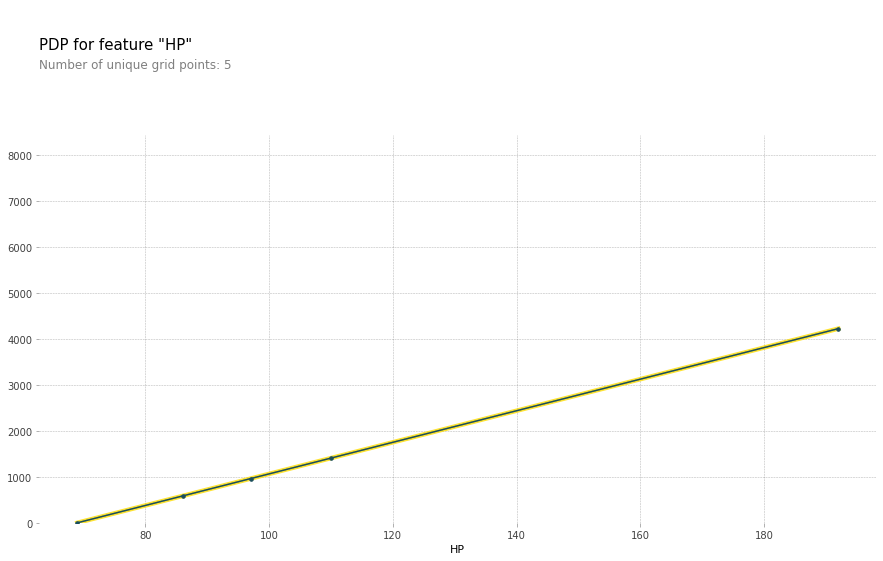

In [69]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 13 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(reg_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected HP with 15 clusters.


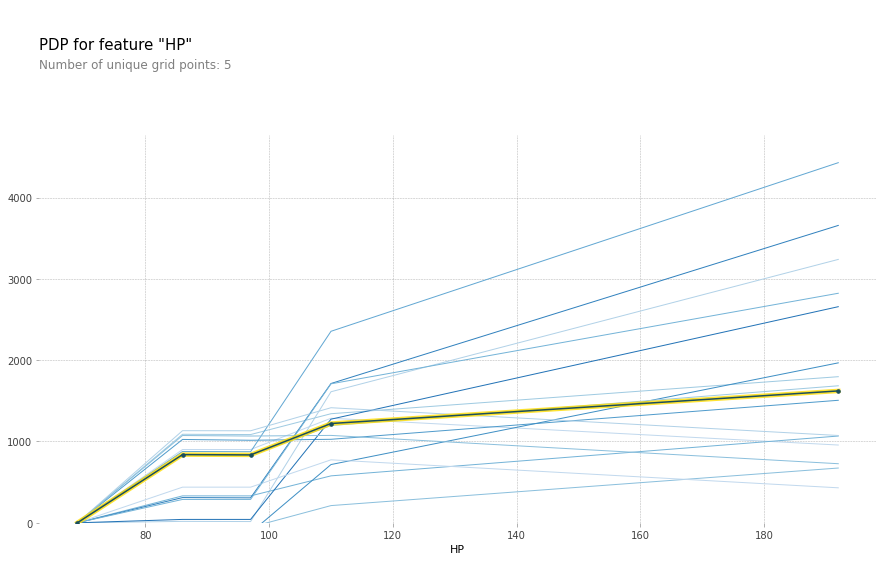

In [71]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected KM with 13 clusters.


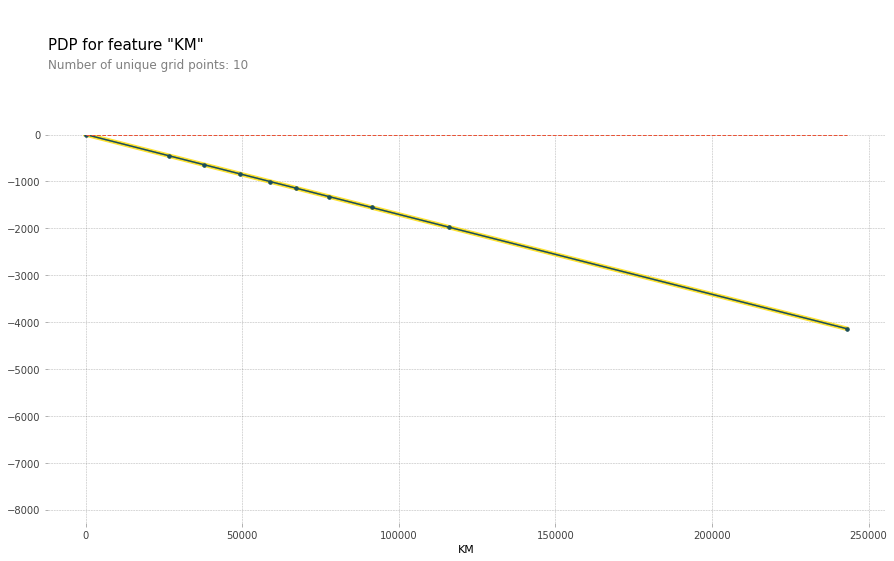

In [70]:
#@title Select a predictor to analyse Linear Regression Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 13 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(reg_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected KM with 15 clusters.


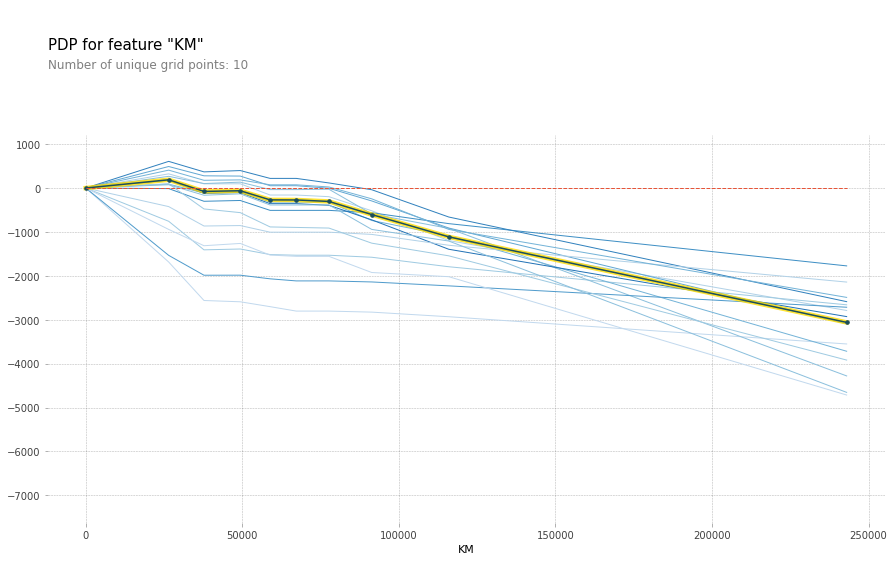

In [72]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)